## **Question 4**

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/question 4.csv")
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,accident_year,day_of_week,date,accident_severity,light_conditions,number_of_casualties,weather_conditions,vehicle_type,casualty_severity,casualty_type
0,2020,3,04/02/2020,3,1,1,9,9,3,0
1,2020,2,27/04/2020,3,1,2,1,9,3,0
2,2020,2,27/04/2020,3,1,2,1,9,3,0
3,2020,4,01/01/2020,3,4,1,1,9,3,0
4,2020,4,01/01/2020,2,4,1,1,8,2,0


In [ ]:
data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


accident_year           0
day_of_week             0
date                    0
accident_severity       0
light_conditions        0
number_of_casualties    0
weather_conditions      0
vehicle_type            0
casualty_severity       0
casualty_type           0
dtype: int64

In [ ]:
data = data.drop(['date','accident_year'],axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data['accident_severity'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3    171376
2     44828
1      4231
Name: accident_severity, dtype: int64

In [ ]:
#getting the first 1000 rows
data = data.iloc[:1000]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
acci1 = (data[data['accident_severity']==1]
         .groupby(['weather_conditions', 'vehicle_type'])['light_conditions']
         .sum().unstack().reset_index().fillna(0)
         .set_index('weather_conditions'))

acci2 = (data[data['accident_severity']==2]
         .groupby(['weather_conditions', 'vehicle_type'])['light_conditions']
         .sum().unstack().reset_index().fillna(0)
         .set_index('weather_conditions'))

acci3 = (data[data['accident_severity']==3]
         .groupby(['weather_conditions', 'vehicle_type'])['light_conditions']
         .sum().unstack().reset_index().fillna(0)
         .set_index('weather_conditions'))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def hot_encode(x):
  if(x<= 0):
    return 0
  if(x>= 1):
    return 1

# Encoding the datasets
acci1_encoded = acci1.applymap(hot_encode)
acci1 = acci1_encoded

acci2_encoded = acci2.applymap(hot_encode)
acci2 = acci2_encoded

acci3_encoded = acci3.applymap(hot_encode)
acci3 = acci3_encoded

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
acci2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


vehicle_type,1,2,3,5,8,9,11,19,21
weather_conditions,,,,,,,,,
1,1,1,1,1,1,1,1,1,1
2,0,0,1,0,0,1,1,0,0
8,0,0,0,0,0,1,0,0,0
9,1,0,0,0,0,0,0,0,0


In [ ]:
# Building the model
frq_items = apriori(acci1, min_support = 0.05, use_colnames = True)

# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric = "lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
print(rules.head())

  antecedents consequents  antecedent support  consequent support   support  \
0         (1)        (21)            0.333333            0.666667  0.333333   
2         (3)        (21)            0.333333            0.666667  0.333333   
1        (21)         (1)            0.666667            0.333333  0.333333   
3        (21)         (3)            0.666667            0.333333  0.333333   

   confidence  lift  leverage  conviction  zhangs_metric  
0         1.0   1.5  0.111111         inf            0.5  
2         1.0   1.5  0.111111         inf            0.5  
1         0.5   1.5  0.111111    1.333333            1.0  
3         0.5   1.5  0.111111    1.333333            1.0  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Building the model
frq_items = apriori(acci2, min_support = 0.05, use_colnames = True)

# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric = "lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
print(rules.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   antecedents consequents  antecedent support  consequent support  support  \
16         (2)         (5)                0.25                0.25     0.25   
17         (5)         (2)                0.25                0.25     0.25   
18         (8)         (2)                0.25                0.25     0.25   
19         (2)         (8)                0.25                0.25     0.25   
24         (2)        (19)                0.25                0.25     0.25   

    confidence  lift  leverage  conviction  zhangs_metric  
16         1.0   4.0    0.1875         inf            1.0  
17         1.0   4.0    0.1875         inf            1.0  
18         1.0   4.0    0.1875         inf            1.0  
19         1.0   4.0    0.1875         inf            1.0  
24         1.0   4.0    0.1875         inf            1.0  


In [ ]:
# Building the model
frq_items = apriori(acci3, min_support = 0.05, use_colnames = True)

# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric = "lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
print(rules.head())

   antecedents consequents  antecedent support  consequent support   support  \
82        (17)         (4)            0.142857            0.142857  0.142857   
83         (4)        (17)            0.142857            0.142857  0.142857   
90        (97)         (4)            0.142857            0.142857  0.142857   
91         (4)        (97)            0.142857            0.142857  0.142857   
92        (98)         (4)            0.142857            0.142857  0.142857   

    confidence  lift  leverage  conviction  zhangs_metric  
82         1.0   7.0  0.122449         inf            1.0  
83         1.0   7.0  0.122449         inf            1.0  
90         1.0   7.0  0.122449         inf            1.0  
91         1.0   7.0  0.122449         inf            1.0  
92         1.0   7.0  0.122449         inf            1.0  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Question 5**

In [ ]:
# Import Libraricies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/question 5.csv')
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Location,accident_severity,day_of_week,time,weather_conditions,light_conditions,Year
0,Birmingham 002B,3,6,08:55,1,1,2020
1,Birmingham 002B,3,4,18:58,1,4,2020
2,Birmingham 002D,3,1,17:34,8,4,2020
3,Birmingham 002D,2,7,16:18,1,1,2020
4,Birmingham 002D,3,2,14:25,1,1,2020


In [ ]:
data['Location'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Kingston upon Hull 016D          27
Haringey 011D                    25
Kingston upon Hull 020B          22
Haringey 023C                    21
Haringey 016B                    20
                                 ..
East Riding of Yorkshire 004B     1
East Riding of Yorkshire 021C     1
Birmingham 075C                   1
East Riding of Yorkshire 004A     1
Birmingham 074D                   1
Name: Location, Length: 963, dtype: int64

In [21]:
# Remove the last four characters or numbers from each column
data['Location'] = data['Location']. str[:-4]
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Location,accident_severity,day_of_week,time,weather_conditions,light_conditions,Year
0,Birmingham,3,6,08:55,1,1,2020
1,Birmingham,3,4,18:58,1,4,2020
2,Birmingham,3,1,17:34,8,4,2020
3,Birmingham,2,7,16:18,1,1,2020
4,Birmingham,3,2,14:25,1,1,2020


In [22]:
data['Location'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Birmingham                   1558
Haringey                      734
Kingston upon Hull            569
East Riding of Yorkshire      488
Newcastle-under-Lyme           96
Name: Location, dtype: int64

In [23]:
data.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Location              object
accident_severity      int64
day_of_week            int64
time                  object
weather_conditions     int64
light_conditions       int64
Year                   int64
dtype: object

In [24]:
# Check for null Values
data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Location              0
accident_severity     0
day_of_week           0
time                  0
weather_conditions    0
light_conditions      0
Year                  0
dtype: int64

In [25]:
data1 = data.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
# Convert the time column to int
data1['time'] = pd.to_datetime(data1['time']).dt.hour
data1['time']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0        8
1       18
2       17
3       16
4       14
        ..
3440    17
3441    12
3442    15
3443     9
3444    13
Name: time, Length: 3445, dtype: int64

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize , LabelEncoder

# Create a label encoder
le = LabelEncoder()

# Encode the categorical data
data1['Location Encoded'] = le.fit_transform(data1['Location'])
data1


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Location,accident_severity,day_of_week,time,weather_conditions,light_conditions,Year,Location Encoded
0,Birmingham,3,6,8,1,1,2020,0
1,Birmingham,3,4,18,1,4,2020,0
2,Birmingham,3,1,17,8,4,2020,0
3,Birmingham,2,7,16,1,1,2020,0
4,Birmingham,3,2,14,1,1,2020,0
...,...,...,...,...,...,...,...,...
3440,Newcastle-under-Lyme,3,7,17,1,1,2020,4
3441,Newcastle-under-Lyme,3,5,12,1,1,2020,4
3442,Newcastle-under-Lyme,3,2,15,1,1,2020,4
3443,Newcastle-under-Lyme,3,4,9,1,1,2020,4


In [28]:
data2 = data1
data1 = data1.drop('Location', axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
# Normalize the data
data2 = data2.drop('Location', axis=1)
data2 = normalize(data2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
data2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[1.48512831e-03, 2.97025663e-03, 3.96034217e-03, ...,
        4.95042772e-04, 9.99986399e-01, 0.00000000e+00],
       [1.48508191e-03, 1.98010922e-03, 8.91049148e-03, ...,
        1.98010922e-03, 9.99955154e-01, 0.00000000e+00],
       [1.48507955e-03, 4.95026516e-04, 8.41545077e-03, ...,
        1.98010606e-03, 9.99953562e-01, 0.00000000e+00],
       ...,
       [1.48510193e-03, 9.90067952e-04, 7.42550964e-03, ...,
        4.95033976e-04, 9.99968632e-01, 1.98013590e-03],
       [1.48512595e-03, 1.98016793e-03, 4.45537785e-03, ...,
        4.95041983e-04, 9.99984806e-01, 1.98016793e-03],
       [1.48511266e-03, 4.95037555e-04, 6.43548821e-03, ...,
        4.95037555e-04, 9.99975861e-01, 1.98015022e-03]])

In [ ]:
def elbow_method(data2, max_clusters):
  """
  Calculates the within-cluster sum of squares for different values of k.
  Plots the within-cluster sum of squares against k and returns the optimal value of k.

  Args:
      data: The data to cluster.
      max_clusters: The Maximum Number of clusters to consider.

  Returns:
      The Optimal value of k.
  """
  within_cluster_sum_of_squares = []
  for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data2)
    within_cluster_sum_of_squares.append(kmeans.inertia_)

  plt.plot(range(1, max_clusters + 1), within_cluster_sum_of_squares)
  plt.title("Elbow Method")
  plt.xlabel('Number of clusters')
  plt.ylabel('within-cluster sum of square')
  plt.show()

  return np.argmin(within_cluster_sum_of_squares) + 1

if __name__ == "__main__":
  data3 = np.random.randint (0, 100, (100, 2))
  optimal_k = elbow_method(data2, 10)
  print("The optimal number of clusters is:", optimal_k)

In [ ]:
# Create a Kmeans model with 3 cluster
model = KMeans(n_clusters = 3)

In [ ]:
# Fit the model to the data
model.fit(data2)

In [34]:
# Predict the cluster labels for each data point
labels = model.predict(data2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
data1['clusters'] = model.labels_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


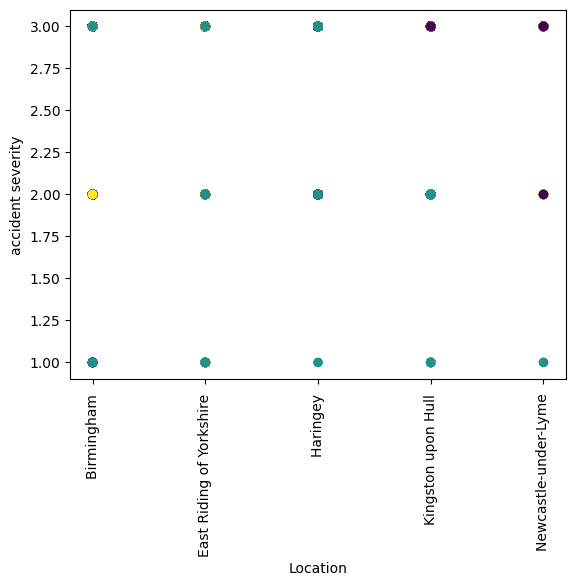

In [36]:
# Visualize the clusters using scatter plot
plt.scatter(data['Location'], data1['accident_severity'], c= data1['clusters'])
plt.xlabel('Location')
plt.ylabel('accident severity')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


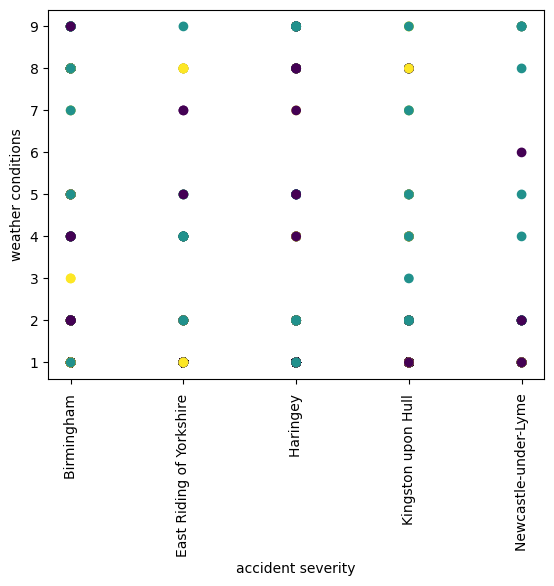

In [37]:
# Visualize the clusters using scatter plot
plt.scatter(data['Location'], data1['weather_conditions'], c= data1['clusters'])
plt.xlabel('accident severity')
plt.ylabel('weather conditions')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


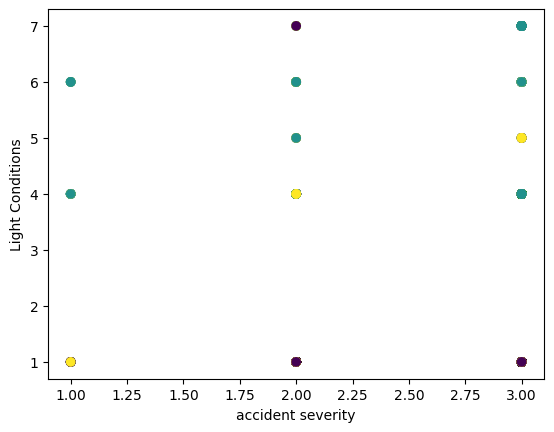

In [38]:
# Visualize the clusters using scatter plot
plt.scatter(data['accident_severity'], data1['light_conditions'], c= data1['clusters'])
plt.xlabel('accident severity')
plt.ylabel('Light Conditions')
plt.show()